# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score

# choose the appropriate code

from sklearn.metrics import ConfusionMatrixDisplay,RocCurveDisplay
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve


In [2]:
# from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [5]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [6]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


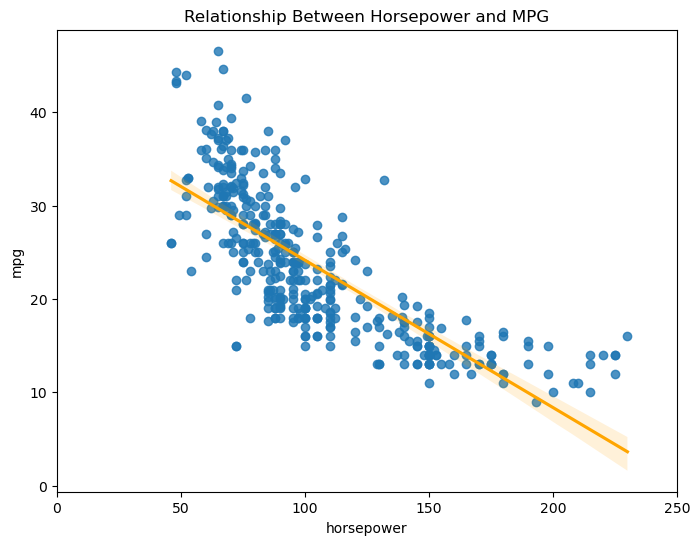

In [7]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [8]:
# call_on_students(1)

#### Answer: 

- With the assumption that the line's intercept is held constant, this graph shows the relationship between the residual sum of squares [= sum( (y_actual(x_i) - h(x_i, theta))**2 ), where h, our hypothesis is the function for our line of best fit, and theta is the slope of that line] and the slope of the line. 


### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

In [9]:
#call_on_students(1)

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [10]:
# call_on_students(1)

#### Answer: 

- step size is the magnitude of the gradient vector, to which each parameter will change by. Learning Rate is a constant that scales this vector to moderate the speed to reach min loss 


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [11]:
# call_on_students(1)

#### Answer: 

- Logistic regression is a parametric model that ultimately classifies data into discrete classes by wrapping linear regression in a sigmoid function to predict the probability ~[0,1] of classifying a data point as a class (from the possible target classes), and resolving a decision given a probability decision boundary. 


### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [12]:
# call_on_students(1)

#### Answer: 

- 


## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [13]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [14]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


In [86]:
mpg_class['cylinders'].value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [15]:
# call_on_students(1)

In [19]:
# Train-test split
# Set test_size=0.33 and random_state=42
X_train, X_test, y_train, y_test = train_test_split(mpg_class.drop(columns='target'),
                                                    mpg_class['target'], 
                                                    test_size=.33, 
                                                    random_state=42)

In [21]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [22]:
# call_on_students(1)

#### Part 1: explore the target column breakdown in train data

In [27]:
# Code to explore
print('nans:',y_train.isna().sum())
display(y_train.value_counts())
display(y_train.value_counts(normalize=True))

nans: 0


0    195
1     67
Name: target, dtype: int64

0    0.744275
1    0.255725
Name: target, dtype: float64

#### Answer:

- no nans
- Value_counts = {0:195,1:76}
- Value_counts_Norm = {0:.744,1:.256}



#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- A 'model-less' dummy classifier which always predicts the majority class 0


#### Part 3: How accurate would that baseline be on test data?


In [32]:
# Code to find the answer
np.mean([y_train.iloc[i] == 0 for i in range(len(y_train))])

0.7442748091603053

#### Answer:

- we would expect an accuracy of 74.4%


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [33]:
# call_on_students(1)

#### Answer:

- We will have many false negatives.


### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [34]:
# call_on_students(1)

In [36]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

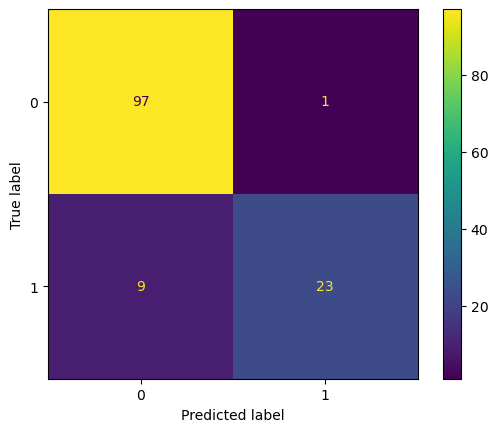

In [38]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(logreg,X_test,y_test);

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [ ]:
# call_on_students(1)

In [45]:
# Accuracy
accuracy_score(y_test, logreg.predict(X_test))

0.9230769230769231

In [46]:
# Precision
precision_score(y_test, logreg.predict(X_test))

0.9583333333333334

In [47]:
# Recall
recall_score(y_test, logreg.predict(X_test))

0.71875

In [48]:
# F1-Score
f1_score(y_test, logreg.predict(X_test))

0.8214285714285714

### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [49]:
# call_on_students(1)

In [66]:
# Calculate roc-auc
roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])

0.9811862244897959

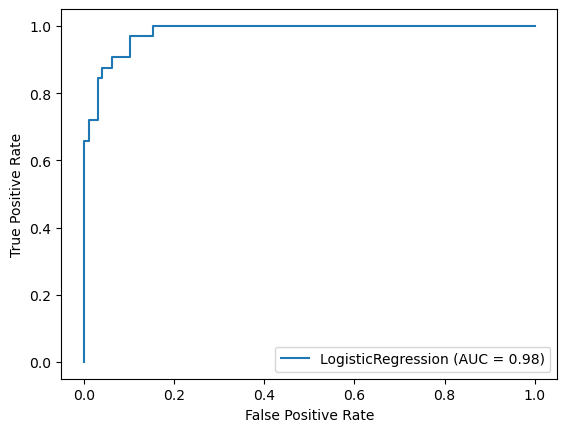

In [68]:
# Plot the ROC curve
plot_roc_curve(logreg,X_test,y_test);

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [ ]:
# call_on_students(1)

#### Answer:

- 


## Part 4: Decision Trees

### Set Up - Generating 1-split trees to compare

In [73]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)
X_train = pd.DataFrame(data=X_train,
                       columns=mpg_class.drop(columns='target').columns)
X_test = pd.DataFrame(data=X_test,
                      columns=mpg_class.drop(columns='target').columns)
# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

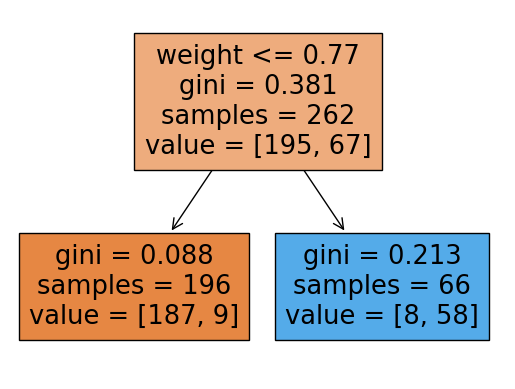

In [74]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, feature_names=['weight'], filled=True);

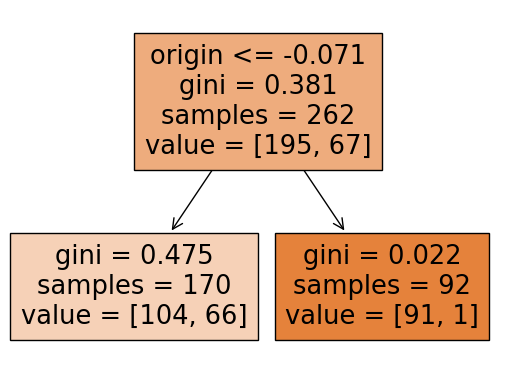

In [75]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, feature_names=['origin'], filled=True);

#### Result: 

(showing the image output incase there is a problem with the above code to generate and visualize these trees)

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [76]:
# call_on_students(1)

#### Answer:

- Version 1 has lower sum of gini scores, hence more information gain on the split


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [77]:
# call_on_students(1)

In [80]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

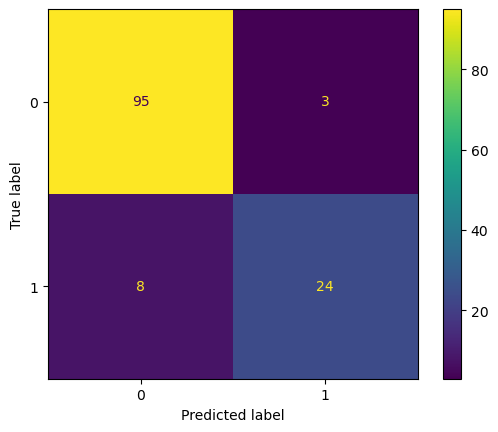

In [82]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(dt,X_test,y_test);

In [87]:
import sklearn.metrics.classification. as cr

ModuleNotFoundError: No module named 'sklearn.metrics.classification_report'

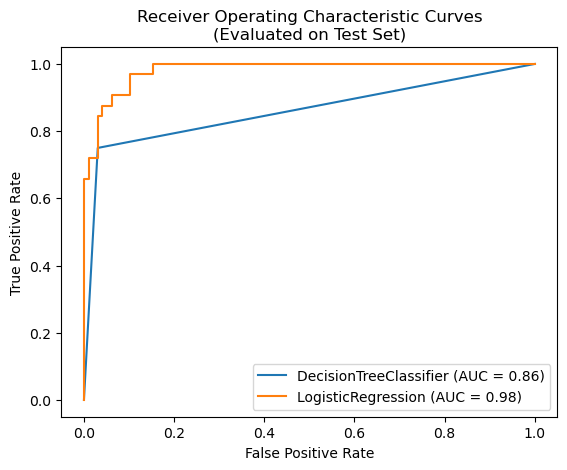

NameError: name 'cr' is not defined

In [88]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()

plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(logreg, X_test, y_test, ax=ax)
 
# or 
    
#RocCurveDisplay.from_estimator(dt, X_test_scaled, y_test, ax=ax)
#RocCurveDisplay.from_estimator(logreg, X_test_scaled, y_test, ax=ax)


plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()
cr(y_test, logreg.predict(X_test))

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- Given ROC_AUC score as our metric, Logistic Regression makes better predicions over DecisionTreeClassifier
